# Newsguard

Scraping for some more

In [51]:
from selenium import webdriver
import json
import os
import requests
import time

import seaborn as sns

import math

In [3]:
intersection = json.load(open("ns_fixed.json", "r"))
len(intersection)

2643

In [14]:
driver = webdriver.Chrome("chromedriver.exe")
driver.get("https://www.newsguardtech.com")

In [25]:
def scrapeScore(newsSource, driver):
    url = "https://api.newsguardtech.com/label/{}?cid=dbf8d78b-0a13-4a78-8905-a3f2d6a36f35".format(newsSource)
    driver.get(url)
    time.sleep(2)
    score = driver.find_element_by_xpath('//*[@id="root"]/main/div/div/div[2]/aside/header/div/div')
    return score.text

In [26]:
scrapeScore("cnn.com", driver)

'80 / 100'

In [28]:
ns_scores = dict()
counter = 0
for ns in intersection:
    try:
        ns_scores[ns] = scrapeScore(ns, driver)
    except:
        ns_scores[ns] = None
    counter += 1
    if counter%50==0:
        print(f"Done {counter}\tlen(ns_scores) = {len(ns_scores)}")

Done 50	len(ns_scores) = 50
Done 100	len(ns_scores) = 100
Done 150	len(ns_scores) = 150
Done 200	len(ns_scores) = 200
Done 250	len(ns_scores) = 250
Done 300	len(ns_scores) = 300
Done 350	len(ns_scores) = 350
Done 400	len(ns_scores) = 400
Done 450	len(ns_scores) = 450
Done 500	len(ns_scores) = 500
Done 550	len(ns_scores) = 550
Done 600	len(ns_scores) = 600
Done 650	len(ns_scores) = 650
Done 700	len(ns_scores) = 700
Done 750	len(ns_scores) = 750
Done 800	len(ns_scores) = 800
Done 850	len(ns_scores) = 850
Done 900	len(ns_scores) = 900
Done 950	len(ns_scores) = 950
Done 1000	len(ns_scores) = 1000
Done 1050	len(ns_scores) = 1050
Done 1100	len(ns_scores) = 1100
Done 1150	len(ns_scores) = 1150
Done 1200	len(ns_scores) = 1200
Done 1250	len(ns_scores) = 1250
Done 1300	len(ns_scores) = 1300
Done 1350	len(ns_scores) = 1350
Done 1400	len(ns_scores) = 1400
Done 1450	len(ns_scores) = 1450
Done 1500	len(ns_scores) = 1500
Done 1550	len(ns_scores) = 1550
Done 1600	len(ns_scores) = 1600
Done 1650	len(ns

In [43]:
rated = [(k, float(s.split(' / ')[0])) for k,s in ns_scores.items() if s]
len(rated)

1285

In [44]:
rated

[('seekingalpha.com', 95.0),
 ('esquire.com', 87.5),
 ('wnep.com', 90.0),
 ('wsj.com', 100.0),
 ('bongino.com', 49.5),
 ('rnd.de', 92.5),
 ('oann.com', 17.5),
 ('yorkshirepost.co.uk', 87.5),
 ('roanoke.com', 92.5),
 ('macrumors.com', 92.5),
 ('news-medical.net', 87.5),
 ('dcist.com', 100.0),
 ('haaretz.com', 92.5),
 ('rapidcityjournal.com', 85.0),
 ('hcn.org', 100.0),
 ('geneticliteracyproject.org', 100.0),
 ('kcra.com', 100.0),
 ('popular.info', 100.0),
 ('kcrw.com', 100.0),
 ('drugs.com', 95.0),
 ('americanthinker.com', 12.5),
 ('sputniknews.com', 20.0),
 ('wsoctv.com', 75.0),
 ('nbc4i.com', 87.5),
 ('timesofisrael.com', 100.0),
 ('buzzfeednews.com', 100.0),
 ('theamericanconservative.com', 67.0),
 ('virginiamercury.com', 87.5),
 ('cheddar.com', 75.0),
 ('nbcnewyork.com', 82.5),
 ('ibtimes.com', 70.0),
 ('heart.org', 95.0),
 ('abajournal.com', 100.0),
 ('al.com', 95.0),
 ('mcall.com', 92.5),
 ('golem.de', 100.0),
 ('kutv.com', 90.0),
 ('kplctv.com', 100.0),
 ('wfla.com', 87.5),
 ('lg

In [47]:
reliable = [k for k,s in rated if s>60]
len(reliable)

1228

In [48]:
unreliable = [k for k,s in rated if s<=60]
len(unreliable)

57

<AxesSubplot:ylabel='Count'>

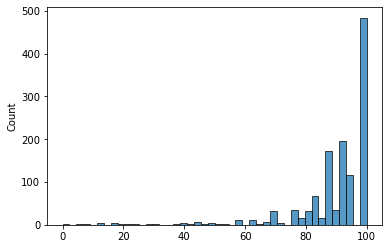

In [55]:
sns.histplot([s for k,s in rated])

In [57]:
57/len(rated)

0.0443579766536965

In [56]:
unreliable

['bongino.com',
 'oann.com',
 'americanthinker.com',
 'sputniknews.com',
 'prageru.com',
 'dailykos.com',
 'frontpagemag.com',
 'bizpacreview.com',
 'activistpost.com',
 'ntd.com',
 'rt.com',
 'lifesitenews.com',
 'judicialwatch.org',
 'beforeitsnews.com',
 'arabnews.com',
 'mintpressnews.com',
 'spectator.org',
 'infowars.com',
 'redstate.com',
 'mindbodygreen.com',
 'xinhuanet.com',
 'digg.com',
 'theepochtimes.com',
 'zerohedge.com',
 'thefederalist.com',
 'naturalnews.com',
 'independentsentinel.com',
 'gulfnews.com',
 'peta.org',
 'sciencetimes.com',
 'globaltimes.cn',
 'pjmedia.com',
 'lifenews.com',
 'thenationalpulse.com',
 'aawsat.com',
 'azmirror.com',
 'hightimes.com',
 'tass.com',
 'sharylattkisson.com',
 'techstartups.com',
 'outkick.com',
 'bigleaguepolitics.com',
 'mercola.com',
 'onegreenplanet.org',
 'cgtn.com',
 'middleeastmonitor.com',
 'tmz.com',
 'californiaglobe.com',
 'breitbart.com',
 'amgreatness.com',
 'newsmax.com',
 'wnd.com',
 'thefreethoughtproject.com',
 